### Import Required Models and Helper Classes

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(42)

In [2]:
%reload_ext autoreload
%autoreload 2

PROJECT_DIR = "/Users/raghav/envPython3/experiments/one_class_neural_networks/"
import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)
from src.data.make_dataset import CreateDataSet
from src.models.FF_NN import FF_NN
## Create data for training and testing
createData = CreateDataSet()

/Users/raghav/envPython3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Signatures of the methods


### ===============================================================

 
get_LHC_TestingData: 
        returns-> User can define Number of random Background(Normal) and Signal( Noise) images for supervised    
        training
        
get_LHC_TrainingData: 
        returns-> User Defined: Number of  : Background Images
### ===============================================================

get_LHC_TestingData_With_Random_UniformNoise: 
        returns->  User can define number of random Background(Normal) , Signal( Noise) images  and URN uniform random noise samples to be returned

get_FAKE_Noise_TrainingData
        returns-> 220 : URN

### ===============================================================


#### ===============================================================
### Experiment Setup


- for all methods, the test set is exactly the same (i.e., ones and sevens)

- for OCNN_FakeNoise, the training set does include uniform noise; what we do is treat these as negatives, and add a new term to the objective, which measures the hinge loss when making predictions for these fake points. This is almost exactly the same as the Keras FakeNN method, but instead of using cross-entropy loss, we use hinge-loss; and we additionally learn a parameter r, which controls the fraction of points predicted to be anomalous



In [3]:
## Obtaining the training and testing data
%reload_ext autoreload
%autoreload 2
LHC_DATA_DIR = PROJECT_DIR+"/data/lhc/"
NUM_OF_NORMAL = 5000
NUM_OF_ANOMALIES= 5000
[normal, anomalies] = createData.load_LHCDataset(LHC_DATA_DIR)



## Obtaining the training and testing data

In [4]:

## Obtaining the training and testing data
%reload_ext autoreload
%autoreload 2
NUM_NORMAL = 5000
TRAIN_NUM_ANOMALIES = 5000
TEST_NUM_ANOMALIES = 50
# trainX,trainY = createData.get_MNIST_TrainingData(NUM_NORMAL)
trainX,trainY,train_Anomaly_X,train_Anomaly_Y = createData.get_LHC_TrainingData(normal,anomalies,NUM_NORMAL,TRAIN_NUM_ANOMALIES)
[test_ones,label_ones,test_sevens,label_sevens]= createData.get_LHC_TestingData(normal,anomalies,NUM_NORMAL,TEST_NUM_ANOMALIES)

5000 Positive train samples with shape (5000, 37, 37)
5000 Negative train samples
5000 Positive test samples with shape (5000, 37, 37)
50 Negative test samples


## Train and Test  FF_NN Model Supervised Model

[INFO] 5000 (Signal) Anomalous Samples Appended to training set
[INFO] 10000 Training Samples Contains both Background and Signal
[INFO] compiling model...
[INFO] training network...
[INFO] serializing network...
[INFO] loading network...
5050 Actual test samples
auccary_score: 0.8536633663366336
roc_auc_score: 0.8073
y_true [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_pred [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0]
AUC:  0.8073


/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


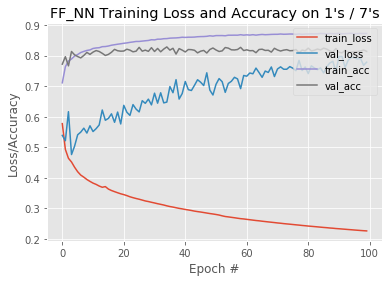

In [5]:
%reload_ext autoreload
%autoreload 2



IMG_DIM= 1369
IMG_HGT =37
IMG_WDT=37
IMG_DEPTH=1
HIDDEN_LAYER_SIZE=684
nClass=2

MODEL_SAVE_PATH = PROJECT_DIR + "/models/LHC/FF_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/LHC/FF_NN/"




print("[INFO]",train_Anomaly_X.shape[0],"(Signal) Anomalous Samples Appended to training set")
data_train = np.concatenate((trainX,train_Anomaly_X),axis=0)
data_train_label = np.concatenate((trainY,train_Anomaly_Y),axis=0)
print("[INFO]",data_train.shape[0],"Training Samples Contains both Background and Signal")
nClass =2
NUM_EPOCHS = 100

clf_FF_NN = FF_NN(IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH)
clf_FF_NN.fit(data_train,data_train_label,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)

## Predict the scores 
auc_FF_NN = clf_FF_NN.score(test_ones,label_ones,test_sevens,label_sevens)
print("===========")
print("AUC: ",auc_FF_NN)
print("===========")

## FakeNoise FF_NN Model

[INFO] 5000 Noise Samples Appended for training set
[INFO] compiling model...
[INFO] training network...
[INFO] serializing network...
[INFO] loading network...
5050 Actual test samples
5050 Predicted test samples
auccary_score: 0.9893069306930693
roc_auc_score: 0.4996
y_true [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
AUC:  0.4996


/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


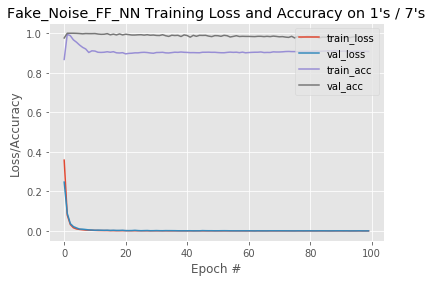

In [6]:
## Fake Noise data to be generated which will be added to the training set before training
%reload_ext autoreload
%autoreload 2


IMG_HGT =37
IMG_WDT=37
IMG_DEPTH=1
IMG_DIM= 1369
HIDDEN_LAYER_SIZE=684
nClass=2

MODEL_SAVE_PATH = PROJECT_DIR + "/models/LHC/FAKE_NOISE_FF_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/LHC/FAKE_NOISE_FF_NN/"



from src.models.Fake_Noise_FF_NN import Fake_Noise_FF_NN
## Remove the Anomalous data and instead add Noise
X_Noise,X_NoiseLabel = createData.get_FAKE_Noise_LHC_TrainingData(trainX)
print("[INFO]",X_Noise.shape[0],"Noise Samples Appended for training set")
data_train = np.concatenate((trainX,X_Noise),axis=0)
data_train_label = np.concatenate((trainY,X_NoiseLabel),axis=0)



clf_FakeNoise_FF_NN = Fake_Noise_FF_NN(IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH)
clf_FakeNoise_FF_NN.fit(data_train,data_train_label,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)
# Predict the scores 

auc_FAKENOISE_FF_NN = clf_FakeNoise_FF_NN.score(test_ones,label_ones,test_sevens,label_sevens)
print("===========")
print("AUC: ",auc_FAKENOISE_FF_NN)
print("===========")

## SKLEARN OCSVM

Training the OCSVM classifier.....
AUC: 0.529716
Training the OCSVM classifier.....
AUC: 0.5568719999999999


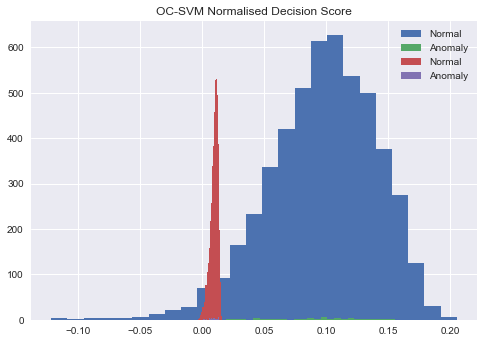

In [7]:
%reload_ext autoreload
%autoreload 2
##create the classifier
from src.models.ocsvmSklearn import OCSVM
IMG_HGT =37
IMG_WDT=37
ocsvm = OCSVM(IMG_HGT,IMG_WDT)
nu= 0.01
kernel = 'linear'
clf = ocsvm.fit(trainX,nu,kernel)
res = ocsvm.score(clf,test_ones,test_sevens)
auc_OCSVM_linear = res
print("="*35)
print("AUC:",res)
print("="*35)

kernel = 'rbf'
clf = ocsvm.fit(trainX,nu,kernel)
res = ocsvm.score(clf,test_ones,test_sevens)
auc_OCSVM_rbf = res
print("="*35)
print("AUC:",res)
print("="*35)

### OC-NN


[INFO] compiling model...
[INFO]  (684,) input  --> hidden layer weights shape ...
[INFO]  (2,) hidden --> output layer weights shape ...
[INFO] training network...
Train on 4500 samples, validate on 500 samples
Epoch 1/100
4500/4500 [==============================] - 1s 132us/step - loss: 8.9913 - val_loss: 9.6039
evaluation for epoch: 0
output: Tensor("Print_100:0", shape=(?, 2), dtype=float32)
Epoch 2/100
4500/4500 [==============================] - 0s 103us/step - loss: 8.9901 - val_loss: 9.6028
evaluation for epoch: 1
output: Tensor("Print_101:0", shape=(?, 2), dtype=float32)
Epoch 3/100
4500/4500 [==============================] - 0s 94us/step - loss: 8.9889 - val_loss: 9.6016
evaluation for epoch: 2
output: Tensor("Print_102:0", shape=(?, 2), dtype=float32)
Epoch 4/100
4500/4500 [==============================] - 0s 92us/step - loss: 8.9877 - val_loss: 9.6005
evaluation for epoch: 3
output: Tensor("Print_103:0", shape=(?, 2), dtype=float32)
Epoch 5/100
4500/4500 [===============

4500/4500 [==============================] - 0s 101us/step - loss: 8.9413 - val_loss: 9.5564
evaluation for epoch: 42
output: Tensor("Print_142:0", shape=(?, 2), dtype=float32)
Epoch 44/100
4500/4500 [==============================] - 0s 97us/step - loss: 8.9401 - val_loss: 9.5553
evaluation for epoch: 43
output: Tensor("Print_143:0", shape=(?, 2), dtype=float32)
Epoch 45/100
4500/4500 [==============================] - 0s 97us/step - loss: 8.9389 - val_loss: 9.5542
evaluation for epoch: 44
output: Tensor("Print_144:0", shape=(?, 2), dtype=float32)
Epoch 46/100
4500/4500 [==============================] - 0s 98us/step - loss: 8.9378 - val_loss: 9.5531
evaluation for epoch: 45
output: Tensor("Print_145:0", shape=(?, 2), dtype=float32)
Epoch 47/100
4500/4500 [==============================] - 0s 99us/step - loss: 8.9366 - val_loss: 9.5520
evaluation for epoch: 46
output: Tensor("Print_146:0", shape=(?, 2), dtype=float32)
Epoch 48/100
4500/4500 [==============================] - 0s 100us/

4500/4500 [==============================] - 1s 116us/step - loss: 8.8904 - val_loss: 9.5091
evaluation for epoch: 85
output: Tensor("Print_185:0", shape=(?, 2), dtype=float32)
Epoch 87/100
4500/4500 [==============================] - 1s 112us/step - loss: 8.8893 - val_loss: 9.5080
evaluation for epoch: 86
output: Tensor("Print_186:0", shape=(?, 2), dtype=float32)
Epoch 88/100
4500/4500 [==============================] - 1s 111us/step - loss: 8.8881 - val_loss: 9.5069
evaluation for epoch: 87
output: Tensor("Print_187:0", shape=(?, 2), dtype=float32)
Epoch 89/100
4500/4500 [==============================] - 1s 112us/step - loss: 8.8869 - val_loss: 9.5058
evaluation for epoch: 88
output: Tensor("Print_188:0", shape=(?, 2), dtype=float32)
Epoch 90/100
4500/4500 [==============================] - 1s 112us/step - loss: 8.8857 - val_loss: 9.5048
evaluation for epoch: 89
output: Tensor("Print_189:0", shape=(?, 2), dtype=float32)
Epoch 91/100
4500/4500 [==============================] - 1s 11

/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


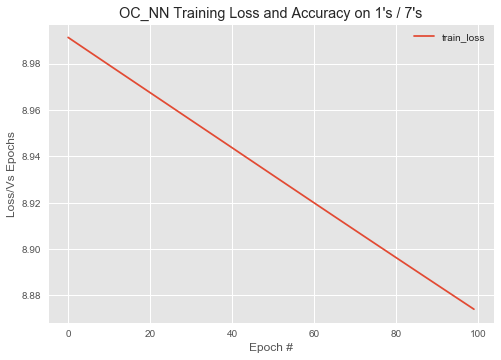

In [10]:
##create the classifier
## Instantiate the object and call the function
%reload_ext autoreload
%autoreload 2

DATASET= "LHC"
IMG_HGT =37
IMG_WDT=37
IMG_DEPTH=1
IMG_DIM= 1369
HIDDEN_LAYER_SIZE=684
nClass=2

MODEL_SAVE_PATH = PROJECT_DIR + "/models/LHC/OC_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/LHC/OC_NN/"
PRE_TRAINED_WT_PATH = PROJECT_DIR +"/models/LHC/FF_NN/"

from src.models.OC_NN import OC_NN
import keras

ocnn = OC_NN(DATASET,IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH,PRE_TRAINED_WT_PATH)


nu= 0.01
NUM_EPOCHS = 100
ocnn.fit(trainX,nu,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)
res = ocnn.score(test_ones,test_sevens) 
auc_OCNN = res

print("="*35)
print("AUC:",res)
print("="*35)








## Comparing  AUC scores of various methods

Text(0.5,1,'AUC Comparision for -- LHC Data ')

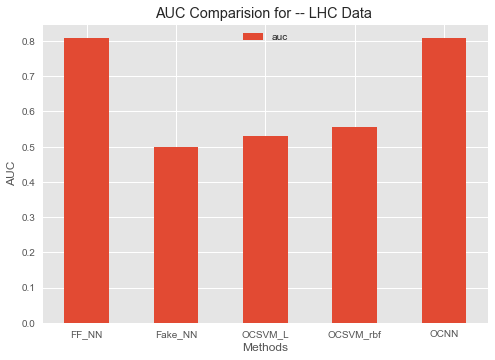

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

auc = np.zeros((1,5))
auc[0][0] = auc_FF_NN
auc[0][1] = auc_FAKENOISE_FF_NN
auc[0][2] = auc_OCSVM_linear
auc[0][3] = auc_OCSVM_rbf
auc[0][4] = auc_OCNN


aucList = [auc_FF_NN,auc_FAKENOISE_FF_NN, auc_OCSVM_linear,auc_OCSVM_rbf, auc_OCNN]

index = ['FF_NN', 'Fake_NN', 'OCSVM_L','OCSVM_rbf','OCNN']
df = pd.DataFrame({'auc': aucList}, index=index)
ax = df.plot.bar(rot=0)

plt.ylabel('AUC')
plt.xlabel('Methods')
plt.title('AUC Comparision for -- LHC Data ')

## Deep SVDD - ICML Paper 2018

### Read the Deep SVDD model related configuration

In [55]:
import sys,os
import os.path as path
cwd = path.abspath(path.join(os.getcwd(),"../"))
print("[INFO] Current working Directory: ",cwd)
print("[INFO] Appending: ",cwd+'/src/models/ICML_Deep_SVDD')
sys.path.append(cwd+'/src/models/ICML_Deep_SVDD')
print("[INFO] Appending: ",cwd+'/src/models/ICML_Deep_SVDD/datasets')
sys.path.append(cwd+'/src/models/ICML_Deep_SVDD/datasets/')


%reload_ext autoreload
%autoreload 2

## Read the config values from Deep_SVDD.ini file 
import configparser
from config import Configuration as Cfg
config = configparser.ConfigParser()
CONFIG_FILE_PATH =  PROJECT_DIR + "/configs/Deep_SVDD.ini"
config.read(CONFIG_FILE_PATH)


## ======== SET THE CONFIGURATION Object  REQUIRED to Execute the experiment####
# plot parameters
Cfg.xp_path = PROJECT_DIR + "/log/lhc"
Cfg.xp_dir = PROJECT_DIR + "/log/lhc"
### Get Experiment related configurations
Cfg.device = str(config['EXPERIMENT']['device'])
Cfg.out_name = str(config['EXPERIMENT']['out_name'])
Cfg.solver = str(config['EXPERIMENT']['solver'])
Cfg.loss = str(config['EXPERIMENT']['loss'])
Cfg.n_epochs=int(config['EXPERIMENT']['n_epochs'])
Cfg.save_at=int(config['EXPERIMENT']['save_at'])
Cfg.in_name=str(config['EXPERIMENT']['in_name'])

# dataset
Cfg.dataset = str(config['DATASET']['dataset'])
Cfg.seed = int(config['DATASET']['seed'])
Cfg.out_frac = float(config['DATASET']['out_frac'])
Cfg.ad_experiment = bool(config['DATASET']['ad_experiment'])
Cfg.weight_dict_init = bool(config['DATASET']['weight_dict_init'])
Cfg.pca = bool(int(config['DATASET']['pca']))
Cfg.unit_norm_used = str(config['DATASET']['unit_norm_used'])
Cfg.gcn = bool(config['DATASET']['gcn'])
Cfg.zca_whitening = bool(config['DATASET']['zca_whitening'])
## MNIST Data Configs
Cfg.mnist_val_frac = float(config['DATASET']['mnist_val_frac'])
Cfg.mnist_bias = bool(config['DATASET']['mnist_bias'])
Cfg.mnist_rep_dim = int(config['DATASET']['mnist_rep_dim'])
Cfg.mnist_architecture = int(config['DATASET']['mnist_architecture'])
Cfg.mnist_normal = int(config['DATASET']['mnist_normal'])
Cfg.mnist_outlier = int(config['DATASET']['mnist_outlier'])
## CIFAR-10 Data Configs
Cfg.cifar10_bias = bool(config['DATASET']['cifar10_bias'])
Cfg.cifar10_rep_dim = int(config['DATASET']['cifar10_rep_dim'])
Cfg.cifar10_architecture = int(config['DATASET']['cifar10_architecture'])
Cfg.cifar10_normal = int(config['DATASET']['cifar10_normal'])
Cfg.cifar10_outlier = int(config['DATASET']['cifar10_outlier'])
Cfg.gtsrb_rep_dim = int(config['DATASET']['gtsrb_rep_dim'])
## LHC Data Configs
Cfg.lhc_val_frac = float(config['DATASET']['lhc_val_frac'])
Cfg.lhc_bias = bool(config['DATASET']['lhc_bias'])
Cfg.lhc_rep_dim = int(config['DATASET']['lhc_rep_dim'])
Cfg.lhc_architecture = int(config['DATASET']['lhc_architecture'])
Cfg.lhc_normal = int(config['DATASET']['lhc_normal'])
Cfg.lhc_outlier = int(config['DATASET']['lhc_outlier'])

# neural network
Cfg.softmax_loss = str(config['NETWORK_ARCHITECTURE']['softmax_loss'] == 'ce')
Cfg.svdd_loss = str(config['NETWORK_ARCHITECTURE']['svdd_loss'] == 'svdd')
Cfg.reconstruction_loss = str(config['NETWORK_ARCHITECTURE']['reconstruction_loss'] == 'autoencoder')
Cfg.use_batch_norm = bool(int(config['NETWORK_ARCHITECTURE']['use_batch_norm']))
Cfg.learning_rate.set_value(float(config['NETWORK_ARCHITECTURE']['learning_rate']))
Cfg.lr_decay = bool(int(config['NETWORK_ARCHITECTURE']['lr_decay']))
Cfg.lr_decay_after_epoch = int(config['NETWORK_ARCHITECTURE']['lr_decay_after_epoch'])
Cfg.lr_drop = bool(int(config['NETWORK_ARCHITECTURE']['lr_drop']))
Cfg.lr_drop_in_epoch = int(config['NETWORK_ARCHITECTURE']['lr_drop_in_epoch'])
Cfg.lr_drop_factor = int(config['NETWORK_ARCHITECTURE']['lr_drop_factor'])
Cfg.momentum.set_value(float(config['NETWORK_ARCHITECTURE']['momentum']))
Cfg.rho.set_value(float(config['NETWORK_ARCHITECTURE']['rmsprop_solver_rho']))
Cfg.rho.set_value(float(config['NETWORK_ARCHITECTURE']['adadelta_solver_rho']))
Cfg.block_coordinate = bool(int(config['NETWORK_ARCHITECTURE']['block_coordinate']))
Cfg.k_update_epochs = int(config['NETWORK_ARCHITECTURE']['k_update_epochs'])
Cfg.center_fixed = bool(int(config['NETWORK_ARCHITECTURE']['center_fixed']))
Cfg.R_update_solver = str(config['NETWORK_ARCHITECTURE']['R_update_solver'])
Cfg.R_update_scalar_method = str(config['NETWORK_ARCHITECTURE']['R_update_scalar_method'])
Cfg.R_update_lp_obj = str(config['NETWORK_ARCHITECTURE']['R_update_lp_obj'])
Cfg.warm_up_n_epochs = int(config['NETWORK_ARCHITECTURE']['warm_up_n_epochs'])
Cfg.batch_size = int(config['NETWORK_ARCHITECTURE']['batch_size'])
Cfg.leaky_relu = bool(int(config['NETWORK_ARCHITECTURE']['leaky_relu']))

# Pre-training and autoencoder configuration
Cfg.pretrain = bool(int(config['PRETRAIN_AUTOENCODER_CONFIG']['pretrain']))
Cfg.ae_loss = str(config['PRETRAIN_AUTOENCODER_CONFIG']['ae_loss'])
Cfg.ae_lr_drop = bool(int(config['PRETRAIN_AUTOENCODER_CONFIG']['ae_lr_drop']))
Cfg.ae_lr_drop_in_epoch = int(config['PRETRAIN_AUTOENCODER_CONFIG']['ae_lr_drop_in_epoch'])
Cfg.ae_lr_drop_factor = int(config['PRETRAIN_AUTOENCODER_CONFIG']['ae_lr_drop_factor'])
Cfg.ae_weight_decay = bool(int(config['PRETRAIN_AUTOENCODER_CONFIG']['ae_weight_decay']))
Cfg.ae_C.set_value(float(config['PRETRAIN_AUTOENCODER_CONFIG']['ae_C']))

# SVDD parameters

Cfg.nu.set_value(float(config['SVDD_PARAMS']['nu']))
Cfg.c_mean_init = bool(int(config['SVDD_PARAMS']['c_mean_init']))
Cfg.c_mean_init_n_batches_all = int(config['SVDD_PARAMS']['c_mean_init_n_batches_all'])
Cfg.c_mean_init_n_batches = int(config['SVDD_PARAMS']['c_mean_init_n_batches'])
Cfg.hard_margin = bool(int(config['SVDD_PARAMS']['hard_margin']))

# regularization
Cfg.weight_decay = bool(int(config['REGULARIZATION_PARAMS']['weight_decay']))
Cfg.C.set_value(float(config['REGULARIZATION_PARAMS']['C']))
Cfg.reconstruction_penalty = bool(int(config['REGULARIZATION_PARAMS']['reconstruction_penalty']))
Cfg.C_rec.set_value(float(config['REGULARIZATION_PARAMS']['C_rec']))
Cfg.dropout = bool(int(config['REGULARIZATION_PARAMS']['dropout']))
Cfg.dropout_architecture = bool(int(config['REGULARIZATION_PARAMS']['dropout_architecture']))

# diagnostics
Cfg.nnet_diagnostics = bool(int(config['DIAGNOSTICS']['nnet_diagnostics']))
Cfg.e1_diagnostics = bool(int(config['DIAGNOSTICS']['e1_diagnostics']))
Cfg.ae_diagnostics = bool(int(config['DIAGNOSTICS']['ae_diagnostics']))
print("[INFO]:  Configurations of Deep_SVDD for LHC Datasets Loaded Successfully...")

[INFO] Current working Directory:  /Users/raghav/envPython3/experiments/one_class_neural_networks
[INFO] Appending:  /Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD
[INFO] Appending:  /Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD/datasets
[INFO]:  Configurations of Deep_SVDD for LHC Datasets Loaded Successfully...


#### Function to set up device and folder to save weights after training

In [56]:
def func_SetUp_BaseFile_PreTrainWeights_GPU_config():
      
    assert os.path.exists(Cfg.xp_dir)

    # default value for basefile: string basis for all exported file names
    if Cfg.out_name:
        base_file = "{}/{}".format(Cfg.xp_dir, Cfg.out_name)
    else:
        base_file = "{}/{}_{}_{}".format(Cfg.xp_dir, Cfg.dataset, Cfg.solver, Cfg.loss)

    # if pickle file already there, consider run already done
    if (os.path.exists("{}_weights.p".format(base_file)) and os.path.exists("{}_results.p".format(base_file))):
        print("[INFO] :  {}_weights.p".format(base_file),"and {}_results.p".format(base_file),"already exists Exiting the system" )
        print("[INFO] : Kindly Check the Anomaly detection results @ log folder ")
        sys.exit()
    else:
        print("[INFO ]: Preparing suitable folder for saving the weights @:",Cfg.xp_dir)

    # computation device
    print("[INFO ]: Checking if the system has GPU availability ")
    if 'gpu' in Cfg.device:
        theano.sandbox.cuda.use(Cfg.device)

    # set save_at to n_epochs if not provided
    save_at = Cfg.n_epochs if not Cfg.save_at else Cfg.save_at

    save_to = "{}_weights.p".format(base_file)
    weights = "../log/{}.p".format(Cfg.in_name) if Cfg.in_name else None
    
    return weights

    

## Train Deep SVDD and obtain results

In [59]:

%reload_ext autoreload
%autoreload 2

from Deep_SVDD import DL_SVDD
from utils.log import log_exp_config, log_NeuralNet, log_AD_results
from utils.visualization.diagnostics_plot import plot_diagnostics, plot_ae_diagnostics
from utils.visualization.filters_plot import plot_filters
from utils.visualization.images_plot import plot_outliers_and_most_normal

# Need to read a set of configurations from a file and set it
MODEL_SAVE_PATH = PROJECT_DIR + "models/LHC/Deep_SVDD/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/LHC/Deep_SVDD/"

PRETRAIN_AE_ADAM_LEARNING_RATE = 0.0001
PRETRAIN_AE_NUM_OF_EPOCHS = 1

### Set up pretrained weights if already present exit the system considering expriment is already executed
## Please check the results in the respective folder
weights = func_SetUp_BaseFile_PreTrainWeights_GPU_config()

# # train  Similar to fit method
clf_svdd = DL_SVDD(dataset=Cfg.dataset, use_weights=weights, pretrain=Cfg.pretrain)
print("[INFO]: Creation of DL_SVDD object complete: ")

# pre-train weights via autoencoder, if specified
if Cfg.pretrain:
    print("[INFO]: Configuring Autoencoder Pretrain Learning Rate : ",PRETRAIN_AE_ADAM_LEARNING_RATE)
    print("[INFO]: Configuring Autoencoder Number of Epochs: ",PRETRAIN_AE_NUM_OF_EPOCHS)
    clf_svdd.pretrain(solver="adam", lr=PRETRAIN_AE_ADAM_LEARNING_RATE, n_epochs=PRETRAIN_AE_NUM_OF_EPOCHS)
    print("[INFO]: Obtaining Autoencoder Pretrain weights Completed.... ")

## Traint the DEEP SVDD Anomaly Detector
clf_svdd.train(solver=args.solver, n_epochs=args.n_epochs, save_at=save_at, save_to=save_to)


# pickle/serialize AD results
print("[INFO]: Pickle/serialize Anomaly Detection results")
if Cfg.ad_experiment:
    clf_svdd.log_results(filename=Cfg.xp_path + "/AD_results.p")

# text log

Cfg.lr = PRETRAIN_AE_ADAM_LEARNING_RATE
print("[INFO]: Setting learning rate : ",Cfg.lr)

print("[INFO]: Save experiment conducted in a pickle file @ ","{}_results.p".format(base_file))
clf_svdd.log.save_to_file("{}_results.p".format(base_file))  # save log
print("[INFO] Log configuration of the experiment in a .txt-file")
log_exp_config(Cfg.xp_path, Cfg.dataset)
print("[INFO] Log configuration of the Deep SVVDD Neural Network Configurations in a .txt-file")
log_NeuralNet(Cfg.xp_path, Cfg.loss, Cfg.solver, Cfg.lr, Cfg.momentum, None, Cfg.n_epochs, Cfg.C, Cfg.C_rec,
              Cfg.nu)

if Cfg.ad_experiment:
    log_AD_results(Cfg.xp_path, clf_svdd)
    print("[INFO]: Saving Anomaly Detection result log files complete @ ")

    
# plot diagnostics
if Cfg.nnet_diagnostics:
    # common suffix for plot titles
    str_lr = "lr = " + str(PRETRAIN_AE_ADAM_LEARNING_RATE)
    C = int(Cfg.C)
    if not Cfg.weight_decay:
        C = None
    str_C = "C = " + str(C)
    Cfg.title_suffix = "(" + Cfg.solver + ", " + str_C + ", " + str_lr + ")"

    if Cfg.loss == 'autoencoder':
        print("[INFO]: Saving Autoencoder Objective function and epoch variations diagnostics  ")
        plot_ae_diagnostics(clf_svdd, Cfg.xp_path, Cfg.title_suffix)
    else:
        print("[INFO]: Saving Deep SVDD Objective function and epoch variations diagnostics  ")
        plot_diagnostics(clf_svdd, Cfg.xp_path, Cfg.title_suffix)

print("[INFO]: Saving Deep SVDD filters diagnostics  ")
plot_filters(clf_svdd, Cfg.xp_path, Cfg.title_suffix)

# If AD experiment, plot most anomalous and most normal
if Cfg.ad_experiment:
    n_img = 37
    print("[INFO]: Plotting Outliers and most normal images  ")
    plot_outliers_and_most_normal(nnet, n_img, Cfg.xp_path)

# ## Predict the scores 
# auc_FF_NN = clf_FF_NN.score(test_ones,label_ones,test_sevens,label_sevens)
# print("===========")
# print("AUC: ",auc_FF_NN)
# print("===========")

/Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/raghav/e

/Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/raghav/e

/Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/raghav/e

/Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/raghav/e

/Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/raghav/e

/Users/raghav/envPython3/experiments/one_class_neural_networks/src/models/ICML_Deep_SVDD/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/raghav/anaconda5_2/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/raghav/envPython3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/raghav/e

[INFO ]: Preparing suitable folder for saving the weights @: /Users/raghav/envPython3/experiments/one_class_neural_networks//log/lhc
[INFO ]: Checking if the system has GPU availability 
[INFO ]:  Configuring experiment for Anomaly Detection [AD]
[INFO ]:  Please wait while  lhc  data is being loaded...
[INFO] : Data loaded.
[INFO] : Building Autoencoder Architecture.
[INFO] : learn a dictionary of n_filters atoms from n_sample images from X.
[INFO] : Dimension of  X. (81000, 1, 37, 37)
[INFO] : Number of channels X. 1


/Users/raghav/envPython3/lib/python3.6/site-packages/sklearn/feature_extraction/image.py:288: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


Learning dictionary for weight initialization...
[dict_learning] .+++++++.+++.+++.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ValueError: `shape` must be a tuple of int and/or [int]

<Figure size 576x396 with 0 Axes>